In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

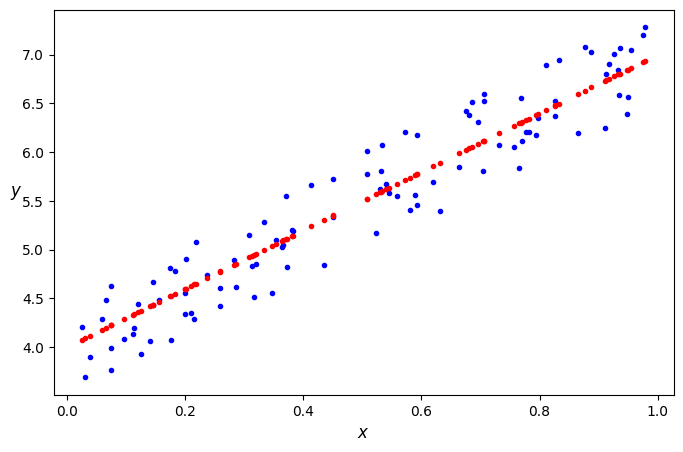

In [2]:
X = np.random.rand(100,1)

THETA = [ 4 , 3 ] # the "true" model coefficients

y_true = THETA[0] + THETA[1] * X

noise = np.random.rand(100, 1)
noise = noise - np.mean(noise)

y = y_true + noise

fig,ax = plt.subplots(figsize=(8,5))
plt.plot(X,y,'b.')
plt.plot(X, y_true, '.', c='red')
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", rotation=0, fontsize=12);

$\hat{\bf y} = X {\bf \theta}$

Let us define the loss (cost) function as:
$L(\mathbf{\theta}) = \frac{1}{2N}\sum_{i=1}^N(\hat{y}_i-y_i)^2$

In [3]:
def cal_loss(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    loss = 1/(2*m) * np.sum(np.square(predictions-y))
    return loss

$\nabla_{\theta} L(\mathbf{\theta}) = \mathbf{X}^T (\mathbf{\hat{y}} - \mathbf{y}) $

In [4]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    loss_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] = theta.T
        loss_history[it]  = cal_loss(theta,X,y)
        
    return theta, loss_history, theta_history

In [5]:
# Stack 1-D arrays as columns into a 2-D array, also see np.r_[] 

a = np.array([1,2,3])
b = np.array([ [4,5,6], [7, 8, 9], [10, 11, 12]] )

print('a')
print(a)
print('b')
print(b)

print('Column stack')
print(np.c_[a,b])

a
[1 2 3]
b
[[ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Column stack
[[ 1  4  5  6]
 [ 2  7  8  9]
 [ 3 10 11 12]]


In [6]:
lr =0.01
n_iter = 5000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta, loss_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(loss_history[-1]))

Theta0:          3.927,
Theta1:          3.147
Final cost/MSE:  0.043


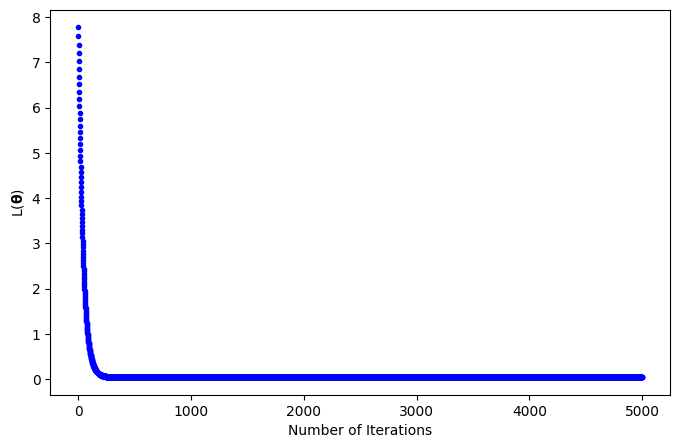

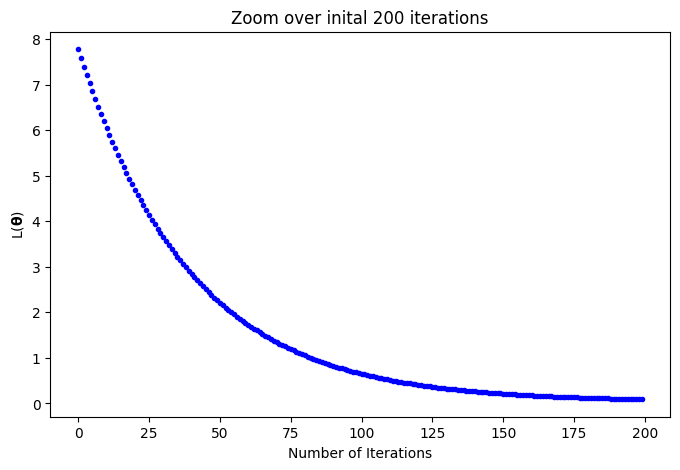

In [7]:
fig,ax = plt.subplots(figsize=(8,5))

ax.set_ylabel('L($\\mathbf{\\theta}$)')
ax.set_xlabel('Number of Iterations')

ax.plot(range(n_iter),loss_history,'b.')

fig,ax = plt.subplots(figsize=(8,5))
ax.set_ylabel('L($\\mathbf{\\theta}$)')
ax.set_xlabel('Number of Iterations')
ax.set_title('Zoom over inital 200 iterations')
ax.plot(range(200),loss_history[:200],'b.');

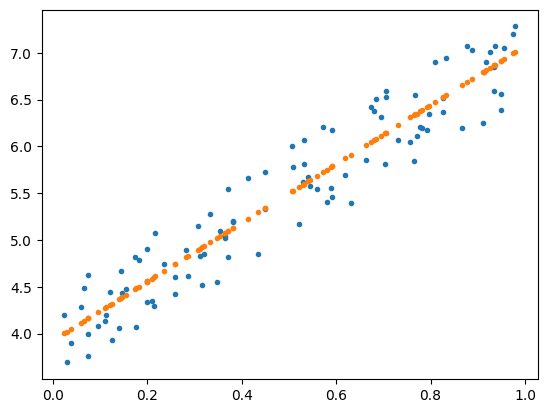

In [8]:
prediction = X_b.dot(theta)
plt.plot(X, y, '.')
plt.plot(X, prediction, '.');

## Trajectory of $(\theta_0,\theta_1)$ parameters over the various iterations
## the red dot is the final position, greed cross is the true value

theta_0: 3.927 (true: 4.000)  theta1: 3.147 (true: 3.000)


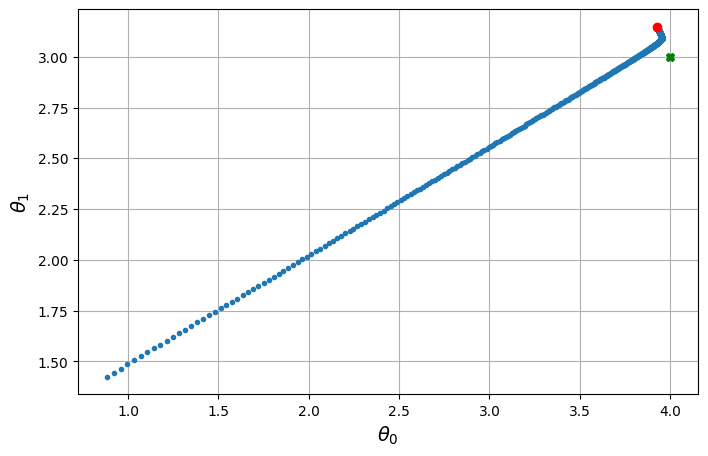

In [9]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_xlabel('$\\theta_0$', fontsize=14)
ax.set_ylabel('$\\theta_1$', fontsize=14)


plt.plot(theta_history[:,0], theta_history[:,1],'.')
plt.plot(theta_history[-1,0], theta_history[-1,1], 'o', color='red')
plt.plot(THETA[0], THETA[1], 'X', color='green')
plt.grid()

print(f"theta_0: {theta[0][0]:.3f} (true: {THETA[0]:.3f})  theta1: {theta[1][0]:.3f} (true: {THETA[1]:.3f})")

## Plot regression/loss vs number of iterations and learning rate

In [10]:
def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot loss history vs Iterations plot

     """
     cmap = matplotlib.colormaps.get_cmap('Oranges')
     theta = np.random.randn(2,1)

     tr = 0.1
     loss_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        loss_history[i] = h[0]

        if ((i % 25 == 0) ):
            ax.plot(X,pred,'-',alpha=tr, color=cmap(i/n_iter))
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        ax1.plot(range(n_iter), loss_history,'b.')
        ax1.grid()

     ax.plot(X,y,'b.')

     return None


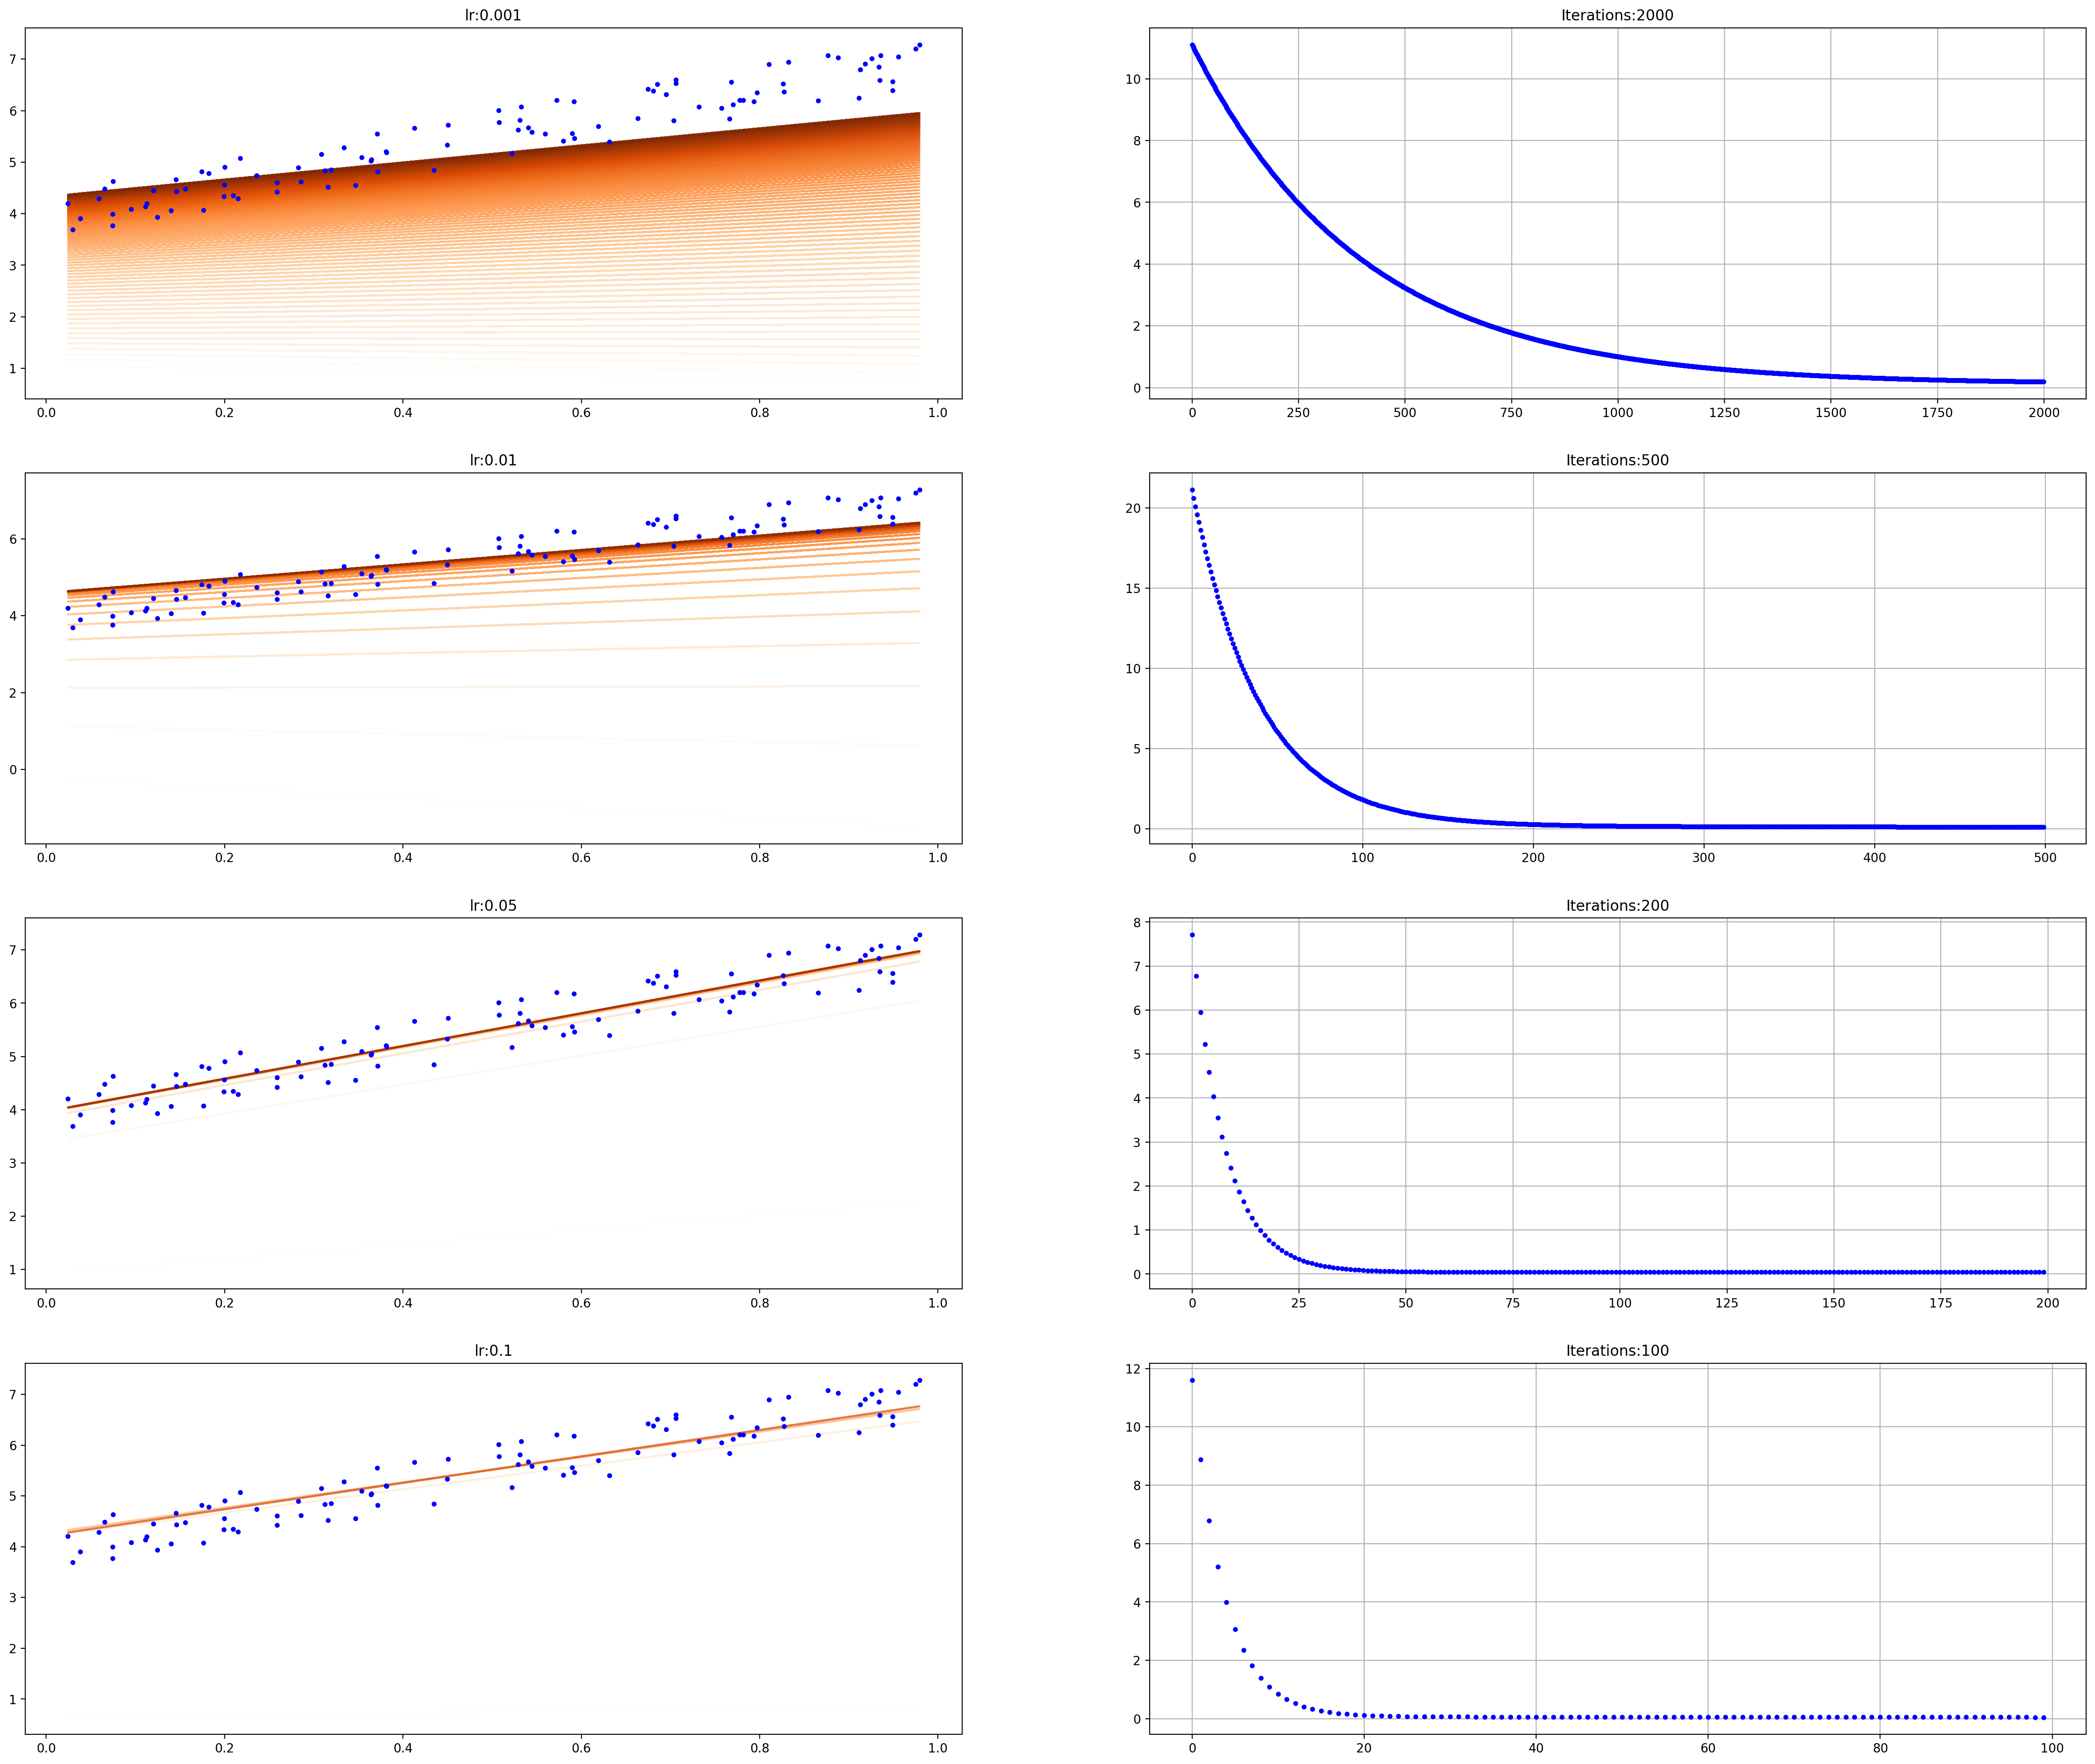

In [11]:
fig = plt.figure(figsize=(30,25),dpi=200)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count = 0
for n_iter, lr in it_lr:
    count += 1
    ax = fig.add_subplot(4,2, count)
    
    # ax = fig.add_subplot(len(it_lr), len(it_lr[0]), count)
    count += 1
   
    ax1 = fig.add_subplot(len(it_lr),len(it_lr[0]),count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)


### Stochastic Gradient Descent

In [12]:
def SGD(X,y,theta,learning_rate,iterations):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of loss history 
    '''
    m = len(y)  # number of observations
    
    loss_history = np.zeros(iterations)
    
    for it in range(iterations):
        loss = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            loss += cal_loss(theta,X_i,y_i)
        loss_history[it]  = loss
    
    return theta, loss_history

In [13]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta, loss_history = SGD(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(loss_history[-1]))

Theta0:          3.796,
Theta1:          3.382
Final cost/MSE:  5.102


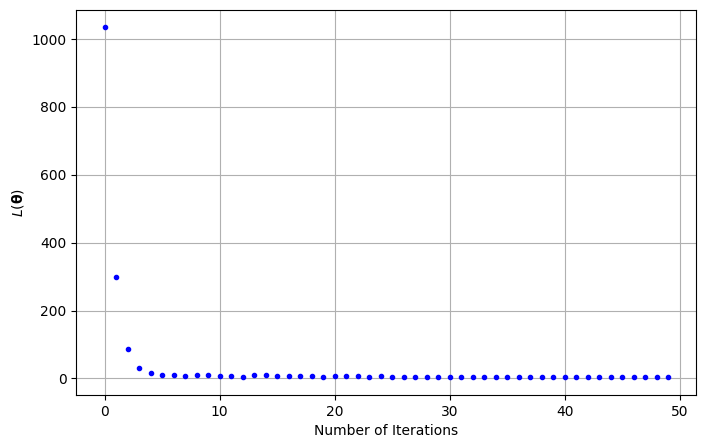

In [14]:
fig,ax = plt.subplots(figsize=(8,5))

ax.set_ylabel(r'$L(\mathbf{\theta})$')
ax.set_xlabel('Number of Iterations')
theta = np.random.randn(2,1)

ax.plot(range(n_iter),loss_history,'b.');
ax.grid();

In [15]:
def plot_SGD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Stochastic Gradient Descent
     ax1 = Axis to plot loss history vs Iterations plot

     """
     cmap = matplotlib.colormaps.get_cmap('Oranges')
     theta = np.random.randn(2,1)

     tr = 0.1
     loss_history = np.zeros(n_iter)
    
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta, loss  = SGD(X_b,y,theta,lr, 1)
        pred = X_b.dot(theta)
        loss_history[i] = loss

        if ((i % 25 == 0) ):
            ax.plot(X, pred,'-',alpha=tr, color=cmap(i/n_iter))
            ax.set_xticklabels([]) # it is need because of randomness on the model might result in differnet x ranges

            if tr < 0.8:
                tr = tr+0.2
    
     if not ax1== None:
         ax1.plot(range(n_iter), loss_history, 'b.')
         ax1.grid()

     ax.plot(X,y,'b.')
    
     return None

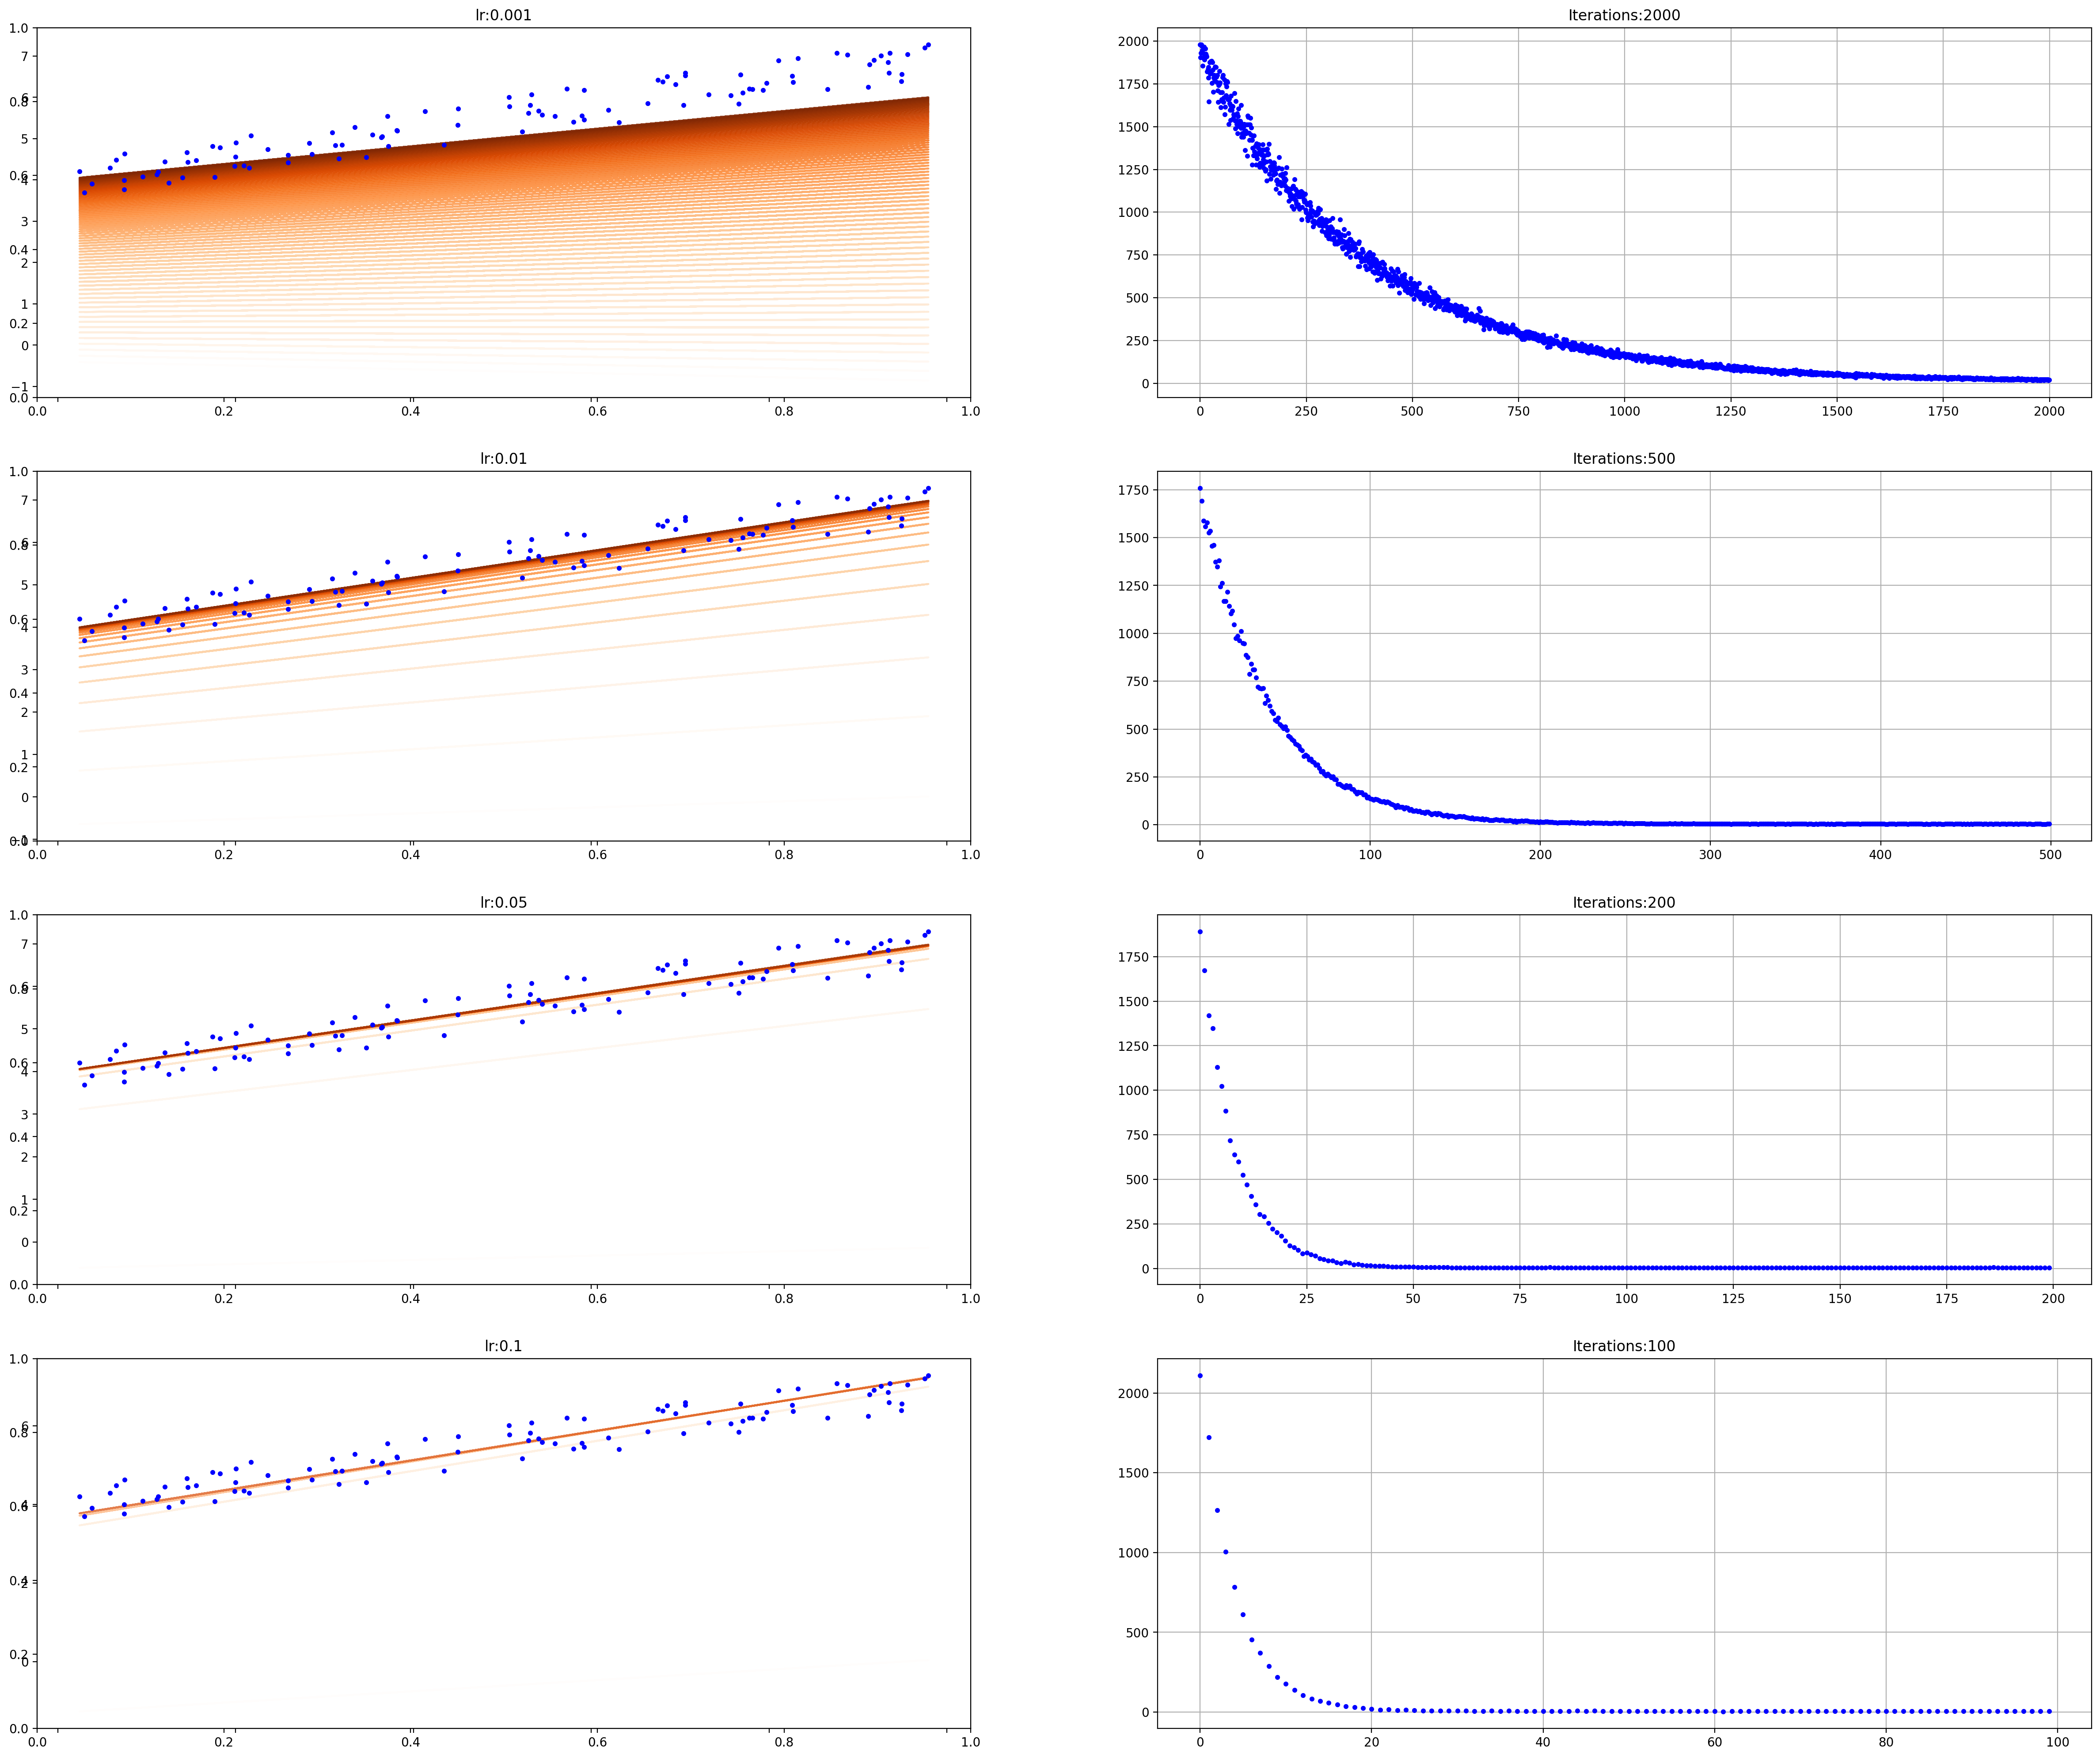

In [16]:
fig = plt.figure(figsize=(30,25),dpi=200)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count = 0

for n_iter, lr in it_lr:
    count += 1    
    ax = fig.add_subplot(4,2, count)
    
    ax = fig.add_subplot(len(it_lr), len(it_lr[0]), count)
   
    count += 1
    ax1 = fig.add_subplot(len(it_lr),len(it_lr[0]),count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_SGD(n_iter,lr,ax,ax1)

### Minibatch Gradient Descent

In [17]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of loss history 
    '''
    m = len(y) # number of observations
    loss_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        loss =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            # Compute L() for the mini batch
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            loss += cal_loss(theta,X_i,y_i)
        loss_history[it]  = loss
        
    return theta, loss_history


In [18]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)


theta, loss_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(loss_history[-1]))


Theta0:          3.892,
Theta1:          3.214
Final cost/MSE:  0.215


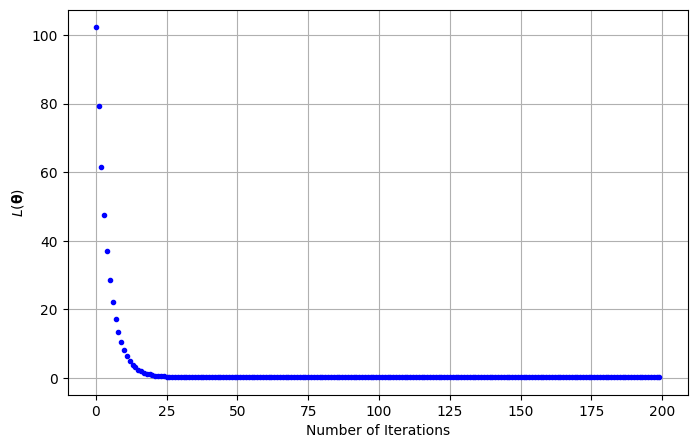

In [19]:
fig,ax = plt.subplots(figsize=(8,5))

ax.set_ylabel(r'$L(\mathbf{\theta})$')
ax.set_xlabel('Number of Iterations')
theta = np.random.randn(2,1)

ax.plot(range(n_iter), loss_history,'b.')

# ax.set_xlim(0,30)
ax.grid()